#### [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/index.html)

In [1]:
import numpy as np
import pandas as pd
from numpy import nan as NaN
import matplotlib.pyplot as plt
from datetime import datetime

# Combining

## merge

### serie & serie

In [2]:
s1 = pd.Series(['ali', 'taha', 'omid', 'sara'], name='Name')
s2 = pd.Series([18, 12, 17], name='Score')

In [3]:
display(s1, s2)

0     ali
1    taha
2    omid
3    sara
Name: Name, dtype: object

0    18
1    12
2    17
Name: Score, dtype: int64

In [4]:
pd.merge(s1, s2, left_index=True, right_index=True)

,Name,Score
0,ali,18
1,taha,12
2,omid,17


In [5]:
pd.merge(s1, s2, left_index=True, right_index=True, how='outer')

,Name,Score
0,ali,18.0
1,taha,12.0
2,omid,17.0
3,sara,NaN


In [6]:
#---------------

In [7]:
s1 = pd.Series([13, 14, 16], ['ali', 'taha', 'omid'], name='Python')
s2 = pd.Series([18, 12, 17], ['ali', 'taha', 'sara'], name='C++')

In [8]:
display(s1, s2)

ali     13
taha    14
omid    16
Name: Python, dtype: int64

ali     18
taha    12
sara    17
Name: C++, dtype: int64

In [9]:
pd.merge(s1, s2, left_index=True, right_index=True)

,Python,C++
ali,13,18
taha,14,12


In [10]:
pd.merge(s1, s2, left_index=True, right_index=True, how='outer')

,Python,C++
ali,13.0,18.0
omid,16.0,NaN
sara,NaN,17.0
taha,14.0,12.0


In [11]:
#---------------

In [12]:
s1 = pd.Series([13, 14, 16], ['ali', 'taha', 'omid'], name='Python')
s1.index.name = 'Name'

In [13]:
s2 = pd.Series([18, 12, 17], ['ali', 'taha', 'sara'], name='C++')
s2.index.name = 'Name'

In [14]:
display(s1, s2)

Name
ali     13
taha    14
omid    16
Name: Python, dtype: int64

Name
ali     18
taha    12
sara    17
Name: C++, dtype: int64

In [15]:
pd.merge(s1, s2, on='Name')

,Python,C++
Name,,
ali,13,18
taha,14,12


In [16]:
pd.merge(s1, s2, on='Name', how='outer')

,Python,C++
Name,,
ali,13.0,18.0
taha,14.0,12.0
omid,16.0,NaN
sara,NaN,17.0


In [17]:
#---------------

In [18]:
s1 = pd.Series([13, 14, 16], ['ali', 'taha', 'omid'], name='Python')
s1.index.name = 'Name'

In [19]:
s2 = pd.Series([18, 12, 17], ['ali', 'taha', 'sara'], name='C++')

In [20]:
display(s1, s2)

Name
ali     13
taha    14
omid    16
Name: Python, dtype: int64

ali     18
taha    12
sara    17
Name: C++, dtype: int64

In [21]:
pd.merge(s1, s2, left_on='Name', right_index=True)

,Python,C++
Name,,
ali,13,18
taha,14,12


In [22]:
pd.merge(s1, s2, left_on='Name', right_index=True, how='outer')

,Name,Python,C++
ali,ali,13.0,18.0
taha,taha,14.0,12.0
omid,omid,16.0,NaN
NaN,sara,NaN,17.0


### dataframe & serie

In [23]:
df = pd.DataFrame({'Python': [13, 14, 16]}, index= ['ali', 'taha', 'omid'])
s = pd.Series([18, 12, 17], ['ali', 'taha', 'sara'], name='C++')

In [24]:
display(df, s)

,Python
ali,13
taha,14
omid,16


ali     18
taha    12
sara    17
Name: C++, dtype: int64

In [25]:
pd.merge(df, s, left_index=True, right_index=True)

,Python,C++
ali,13,18
taha,14,12


In [26]:
pd.merge(df, s, left_index=True, right_index=True, how='outer')

,Python,C++
ali,13.0,18.0
omid,16.0,NaN
sara,NaN,17.0
taha,14.0,12.0


In [27]:
#---------------

In [28]:
df = pd.DataFrame({'Name': ['ali', 'taha', 'omid'], 'Python': [13, 14, 16]})

In [29]:
s = pd.Series([18, 12, 17], ['ali', 'taha', 'sara'], name='C++')
s.index.name = 'Name'

In [30]:
display(df, s)

,Name,Python
0,ali,13
1,taha,14
2,omid,16


Name
ali     18
taha    12
sara    17
Name: C++, dtype: int64

In [31]:
pd.merge(df, s, on='Name')

,Name,Python,C++
0,ali,13,18
1,taha,14,12


In [32]:
pd.merge(df, s, on='Name', how='outer')

,Name,Python,C++
0,ali,13.0,18.0
1,taha,14.0,12.0
2,omid,16.0,NaN
3,sara,NaN,17.0


In [33]:
#---------------

In [34]:
df = pd.DataFrame({'Name': ['ali', 'taha', 'omid'], 'Python': [13, 14, 16]})
df.set_index('Name', inplace=True)

In [35]:
s = pd.Series([18, 12, 17], ['ali', 'taha', 'sara'], name='C++')
s.index.name = 'Name'

In [36]:
display(df, s)

,Python
Name,
ali,13
taha,14
omid,16


Name
ali     18
taha    12
sara    17
Name: C++, dtype: int64

In [37]:
pd.merge(df, s, on='Name')

,Python,C++
Name,,
ali,13,18
taha,14,12


In [38]:
pd.merge(df, s, on='Name', how='outer')

,Python,C++
Name,,
ali,13.0,18.0
taha,14.0,12.0
omid,16.0,NaN
sara,NaN,17.0


### dataframe & dataframe

In [39]:
df1 = pd.DataFrame({'Name': ['ali', 'omid', 'taha']})
df2 = pd.DataFrame({'scor': [5, 8, 3]})

In [40]:
display(df1, df2)

,Name
0,ali
1,omid
2,taha


,scor
0,5
1,8
2,3


In [41]:
pd.merge(df1, df2, left_index=True, right_index=True) 

,Name,scor
0,ali,5
1,omid,8
2,taha,3


In [42]:
pd.merge(df1, df2, how='cross')

,Name,scor
0,ali,5
1,ali,8
2,ali,3
3,omid,5
4,omid,8
5,omid,3
6,taha,5
7,taha,8
8,taha,3


In [43]:
#---------------

In [44]:
df1 = pd.DataFrame({'Name': ['ali', 'taha', 'sara'], 'C++': [18, 12, 17]})
df2 = pd.DataFrame({'Java': [15, 17, 18], 'Python': [13, 14, 16]})

In [45]:
display(df1, df2)

,Name,C++
0,ali,18
1,taha,12
2,sara,17


,Java,Python
0,15,13
1,17,14
2,18,16


In [46]:
pd.merge(df1, df2, left_index=True, right_index=True) 

,Name,C++,Java,Python
0,ali,18,15,13
1,taha,12,17,14
2,sara,17,18,16


In [47]:
#---------------

In [48]:
df1 = pd.DataFrame({'C++': [18, 12, 17]}, index=['ali', 'taha', 'sara'])
df2 = pd.DataFrame({'Python': [13, 14, 16]}, index=['ali', 'taha', 'omid'])

In [49]:
display(df1, df2)

,C++
ali,18
taha,12
sara,17


,Python
ali,13
taha,14
omid,16


In [50]:
pd.merge(df1, df2, left_index=True, right_index=True)

,C++,Python
ali,18,13
taha,12,14


In [51]:
pd.merge(df1, df2, left_index=True, right_index=True, how='inner')

,C++,Python
ali,18,13
taha,12,14


In [52]:
pd.merge(df1, df2, left_index=True, right_index=True, how='left')

,C++,Python
ali,18,13.0
taha,12,14.0
sara,17,NaN


In [53]:
pd.merge(df1, df2, left_index=True, right_index=True, how='right')

,C++,Python
ali,18.0,13
taha,12.0,14
omid,NaN,16


In [54]:
pd.merge(df1, df2, left_index=True, right_index=True, how='outer')

,C++,Python
ali,18.0,13.0
omid,NaN,16.0
sara,17.0,NaN
taha,12.0,14.0


In [55]:
pd.merge(df1, df2, left_index=True, right_index=True, how='outer', indicator=True)

,C++,Python,_merge
ali,18.0,13.0,both
omid,NaN,16.0,right_only
sara,17.0,NaN,left_only
taha,12.0,14.0,both


In [56]:
#---------------

In [57]:
df1 = pd.DataFrame({'Name': ['ali', 'taha', 'sara'], 'C++': [18, 12, 17]})
df2 = pd.DataFrame({'Name': ['ali', 'taha', 'omid'], 'Python': [13, 14, 16]})

In [58]:
display(df1, df2)

,Name,C++
0,ali,18
1,taha,12
2,sara,17


,Name,Python
0,ali,13
1,taha,14
2,omid,16


In [59]:
pd.merge(df1, df2)

,Name,C++,Python
0,ali,18,13
1,taha,12,14


In [60]:
pd.merge(df1, df2, on='Name')

,Name,C++,Python
0,ali,18,13
1,taha,12,14


In [61]:
pd.merge(df1, df2, on='Name', how='outer')

,Name,C++,Python
0,ali,18.0,13.0
1,taha,12.0,14.0
2,sara,17.0,NaN
3,omid,NaN,16.0


In [62]:
#---------------

In [63]:
df1 = pd.DataFrame({'FName': ['ali', 'taha', 'sara'], 'LName': ['ram', 'zamani', 'amini'], 'C++': [18, 12, 17]})
df2 = pd.DataFrame({'FName': ['ali', 'taha', 'omid'], 'LName': ['ram', 'zamani', 'abbasi'], 'Python': [13, 14, 16]})

In [64]:
display(df1, df2)

,FName,LName,C++
0,ali,ram,18
1,taha,zamani,12
2,sara,amini,17


,FName,LName,Python
0,ali,ram,13
1,taha,zamani,14
2,omid,abbasi,16


In [65]:
pd.merge(df1, df2, on=['FName', 'LName'])

,FName,LName,C++,Python
0,ali,ram,18,13
1,taha,zamani,12,14


In [66]:
pd.merge(df1, df2, on=['FName', 'LName'], how='outer')

,FName,LName,C++,Python
0,ali,ram,18.0,13.0
1,taha,zamani,12.0,14.0
2,sara,amini,17.0,NaN
3,omid,abbasi,NaN,16.0


..........

In [67]:
df1 = pd.DataFrame({'Name': ['ali', 'taha', 'sara'], 'Python': [18, 12, 17]})
df2 = pd.DataFrame({'Name': ['ali', 'taha', 'omid'], 'Python': [13, 14, 16]})

In [68]:
display(df1, df2)

,Name,Python
0,ali,18
1,taha,12
2,sara,17


,Name,Python
0,ali,13
1,taha,14
2,omid,16


In [69]:
pd.merge(df1, df2, left_index=True, right_index=True)

,Name_x,Python_x,Name_y,Python_y
0,ali,18,ali,13
1,taha,12,taha,14
2,sara,17,omid,16


In [70]:
pd.merge(df1, df2, left_index=True, right_index=True, suffixes=('_T1', '_T2'))

,Name_T1,Python_T1,Name_T2,Python_T2
0,ali,18,ali,13
1,taha,12,taha,14
2,sara,17,omid,16


In [71]:
pd.merge(df1, df2, on='Name', suffixes=('_T1', '_T2'))

,Name,Python_T1,Python_T2
0,ali,18,13
1,taha,12,14


In [72]:
pd.merge(df1, df2, on='Name', how='outer', suffixes=('_T1', '_T2'))

,Name,Python_T1,Python_T2
0,ali,18.0,13.0
1,taha,12.0,14.0
2,sara,17.0,NaN
3,omid,NaN,16.0


In [73]:
#---------------

In [74]:
df1 = pd.DataFrame({'Term1': ['ali', 'taha', 'sara'], 'Python': [18, 12, 17]})
df2 = pd.DataFrame({'Term2': ['ali', 'taha', 'omid'], 'Python': [13, 14, 16]})

In [75]:
display(df1, df2)

,Term1,Python
0,ali,18
1,taha,12
2,sara,17


,Term2,Python
0,ali,13
1,taha,14
2,omid,16


In [76]:
pd.merge(df1, df2, left_index=True, right_index=True)

,Term1,Python_x,Term2,Python_y
0,ali,18,ali,13
1,taha,12,taha,14
2,sara,17,omid,16


In [77]:
pd.merge(df1, df2, left_index=True, right_index=True, suffixes=('_T1', '_T2'))

,Term1,Python_T1,Term2,Python_T2
0,ali,18,ali,13
1,taha,12,taha,14
2,sara,17,omid,16


In [78]:
pd.merge(df1, df2, left_on='Term1', right_on='Term2', suffixes=('_T1', '_T2'))

,Term1,Python_T1,Term2,Python_T2
0,ali,18,ali,13
1,taha,12,taha,14


In [79]:
pd.merge(df1, df2, left_on='Term1', right_on='Term2', how='outer', suffixes=('_T1', '_T2'))

,Term1,Python_T1,Term2,Python_T2
0,ali,18.0,ali,13.0
1,taha,12.0,taha,14.0
2,sara,17.0,NaN,NaN
3,NaN,NaN,omid,16.0


..........

In [80]:
df1 = pd.DataFrame({'X': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'Y': range(7)})
df2 = pd.DataFrame({'X': ['a', 'b', 'd'], 'Z': range(3)})

In [81]:
display(df1, df2)

,X,Y
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


,X,Z
0,a,0
1,b,1
2,d,2


In [82]:
pd.merge(df1, df2, on='X')

,X,Y,Z
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [83]:
pd.merge(df1, df2)

,X,Y,Z
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [84]:
pd.merge(df1, df2, how='outer')

,X,Y,Z
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [85]:
#---------------

In [86]:
df1 = pd.DataFrame({'X': ['b', 'b', 'a', 'c', 'a', 'b'], 'Y': range(6)})
df2 = pd.DataFrame({'X': ['a', 'b', 'a', 'b', 'd'], 'Z': range(5)})

In [87]:
display(df1, df2)

,X,Y
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


,X,Z
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [88]:
pd.merge(df1, df2)

,X,Y,Z
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [89]:
pd.merge(df1, df2, how='outer')

,X,Y,Z
0,b,0.0,1.0
1,b,0.0,3.0
2,b,1.0,1.0
3,b,1.0,3.0
4,b,5.0,1.0
5,b,5.0,3.0
6,a,2.0,0.0
7,a,2.0,2.0
8,a,4.0,0.0
9,a,4.0,2.0


In [90]:
#---------------

In [91]:
df1 = pd.DataFrame({'X': ['a', 'b', 'a', 'a', 'b', 'c'], 'Y': range(6)})
df2 = pd.DataFrame({'Z': [18, 15]}, index=['a', 'b'])

In [92]:
display(df1, df2)

,X,Y
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


,Z
a,18
b,15


In [93]:
pd.merge(df1, df2, left_on='X', right_index=True)

,X,Y,Z
0,a,0,18
2,a,2,18
3,a,3,18
1,b,1,15
4,b,4,15


In [94]:
pd.merge(df1, df2, left_on='X', right_index=True, how='outer')

,X,Y,Z
0,a,0,18.0
2,a,2,18.0
3,a,3,18.0
1,b,1,15.0
4,b,4,15.0
5,c,5,NaN


..........

In [95]:
df1 = pd.DataFrame({'k1': ['f', 'f', 'g'], 'k2': ['one', 'two', 'one'], 'Z': [1, 2, 3]})
df2 = pd.DataFrame({'k1': ['f', 'f', 'g', 'g'],'k2': ['one', 'one', 'one', 'two'],'W': [4, 5, 6, 7]})

In [96]:
display(df1, df2)

,k1,k2,Z
0,f,one,1
1,f,two,2
2,g,one,3


,k1,k2,W
0,f,one,4
1,f,one,5
2,g,one,6
3,g,two,7


In [97]:
pd.merge(df1, df2, on=['k1', 'k2'])

,k1,k2,Z,W
0,f,one,1,4
1,f,one,1,5
2,g,one,3,6


In [98]:
pd.merge(df1, df2, on=['k1', 'k2'], how='outer')

,k1,k2,Z,W
0,f,one,1.0,4.0
1,f,one,1.0,5.0
2,f,two,2.0,NaN
3,g,one,3.0,6.0
4,g,two,NaN,7.0


In [99]:
#---------------

In [100]:
display(df1, df2)

,k1,k2,Z
0,f,one,1
1,f,two,2
2,g,one,3


,k1,k2,W
0,f,one,4
1,f,one,5
2,g,one,6
3,g,two,7


In [101]:
pd.merge(df1, df2, on='k1', suffixes=('_df1', '_df2'))

,k1,k2_df1,Z,k2_df2,W
0,f,one,1,one,4
1,f,one,1,one,5
2,f,two,2,one,4
3,f,two,2,one,5
4,g,one,3,one,6
5,g,one,3,two,7


..........

In [102]:
d = {'X': ['H', 'H', 'H', 'N', 'N'],'Y': [1397, 1398, 1399, 1398, 1399], 'Z': np.arange(5.)}
df1 = pd.DataFrame(d)

In [103]:
i = [['N', 'N', 'H', 'H', 'H', 'H'], [1398, 1397, 1397, 1397, 1398, 1399]]
df2 = pd.DataFrame(np.arange(12).reshape((6, 2)), index=i, columns=['A', 'B'])

In [104]:
display(df1, df2)

,X,Y,Z
0,H,1397,0.0
1,H,1398,1.0
2,H,1399,2.0
3,N,1398,3.0
4,N,1399,4.0


A   B
N 1398   0   1
  1397   2   3
H 1397   4   5
  1397   6   7
  1398   8   9
  1399  10  11

In [105]:
pd.merge(df1, df2, left_on=['X', 'Y'], right_index=True)

,X,Y,Z,A,B
0,H,1397,0.0,4,5
0,H,1397,0.0,6,7
1,H,1398,1.0,8,9
2,H,1399,2.0,10,11
3,N,1398,3.0,0,1


In [106]:
pd.merge(df1, df2, left_on=['X', 'Y'], right_index=True, how='outer')

,X,Y,Z,A,B
0,H,1397,0.0,4.0,5.0
0,H,1397,0.0,6.0,7.0
1,H,1398,1.0,8.0,9.0
2,H,1399,2.0,10.0,11.0
3,N,1398,3.0,0.0,1.0
4,N,1399,4.0,NaN,NaN
4,N,1397,NaN,2.0,3.0


## join 

In [107]:
df = pd.DataFrame({'Name': ['ali', 'taha', 'omid'], 'Python': [13, 14, 16]})
s = pd.Series([18, 12, 17], name='C++')

In [108]:
display(df, s)

,Name,Python
0,ali,13
1,taha,14
2,omid,16


0    18
1    12
2    17
Name: C++, dtype: int64

In [109]:
df.join(s)

,Name,Python,C++
0,ali,13,18
1,taha,14,12
2,omid,16,17


..........

In [110]:
df1 = pd.DataFrame({'Python': {'ali': 12, 'sara': 18, 'taha': 16},
                    'C++':    {'ali': 19, 'sara': 13, 'taha': 5}})

In [111]:
df2 = pd.DataFrame({'Pascal': {'ali': 15, 'sara': 17, 'taha': 19, 'farshid': 3},
                    'C#':     {'ali': 6,  'sara': 18, 'taha': 20, 'farshid': 9}})

In [112]:
df3 = pd.DataFrame({'Java': {'farid': 17, 'sara': 19, 'mahsa': 11, 'taha': 13},
                    'PHP':  {'farid': 12, 'sara': 20, 'mahsa': 6,  'taha': 18}})

In [113]:
display(df1, df2, df3)

,Python,C++
ali,12,19
sara,18,13
taha,16,5


,Pascal,C#
ali,15,6
sara,17,18
taha,19,20
farshid,3,9


,Java,PHP
farid,17,12
sara,19,20
mahsa,11,6
taha,13,18


In [114]:
df1.join([df2, df3])

,Python,C++,Pascal,C#,Java,PHP
ali,12.0,19.0,15.0,6.0,NaN,NaN
sara,18.0,13.0,17.0,18.0,19.0,20.0
taha,16.0,5.0,19.0,20.0,13.0,18.0


In [115]:
df1.join([df2, df3], how='outer')

,Python,C++,Pascal,C#,Java,PHP
ali,12.0,19.0,15.0,6.0,NaN,NaN
sara,18.0,13.0,17.0,18.0,19.0,20.0
taha,16.0,5.0,19.0,20.0,13.0,18.0
farshid,NaN,NaN,3.0,9.0,NaN,NaN
farid,NaN,NaN,NaN,NaN,17.0,12.0
mahsa,NaN,NaN,NaN,NaN,11.0,6.0


In [116]:
df_tow = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')
pd.merge(df_tow, df3, left_index=True, right_index=True, how='outer')

,Python,C++,Pascal,C#,Java,PHP
ali,12.0,19.0,15.0,6.0,NaN,NaN
farid,NaN,NaN,NaN,NaN,17.0,12.0
farshid,NaN,NaN,3.0,9.0,NaN,NaN
mahsa,NaN,NaN,NaN,NaN,11.0,6.0
sara,18.0,13.0,17.0,18.0,19.0,20.0
taha,16.0,5.0,19.0,20.0,13.0,18.0


## concat

two series

In [117]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])

In [118]:
display(s1, s2)

0    a
1    b
dtype: object

0    c
1    d
dtype: object

In [119]:
# axis 0

In [120]:
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [121]:
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [122]:
pd.concat([s1, s2], keys=['s.1', 's.2'])

s.1  0    a
     1    b
s.2  0    c
     1    d
dtype: object

In [123]:
pd.concat([s1, s2], keys=['s.1', 's.2'], names=['SName', 'RowID'])

SName  RowID
s.1    0        a
       1        b
s.2    0        c
       1        d
dtype: object

In [124]:
pd.concat([s1, s2], keys=['s.1', 's.2'], names=['SName', 'RowID']).unstack()

RowID,0,1
SName,,
s.1,a,b
s.2,c,d


In [125]:
# axis 1

In [126]:
pd.concat([s1, s2], axis=1)

,0,1
0,a,c
1,b,d


In [127]:
pd.concat([s1, s2], axis=1, keys=['s.1', 's.2'])

,s.1,s.2
0,a,c
1,b,d


In [128]:
#---------------

In [129]:
s1 = pd.Series([12, 18], index=['ali', 'sara'])
s2 = pd.Series([13, 20, 14], index=['taha', 'mahsa', 'sara'])

In [130]:
display(s1, s2)

ali     12
sara    18
dtype: int64

taha     13
mahsa    20
sara     14
dtype: int64

In [131]:
# axis 0

In [132]:
pd.concat([s1, s2])

ali      12
sara     18
taha     13
mahsa    20
sara     14
dtype: int64

In [133]:
pd.concat([s1, s2], keys=['c++', 'python'])

c++     ali      12
        sara     18
python  taha     13
        mahsa    20
        sara     14
dtype: int64

In [134]:
pd.concat([s1, s2], keys=['c++', 'python'], names=['Dars', 'Name'])

Dars    Name 
c++     ali      12
        sara     18
python  taha     13
        mahsa    20
        sara     14
dtype: int64

In [135]:
pd.concat([s1, s2], keys=['c++', 'python'], names=['Dars', 'Name']).unstack()

Name,ali,mahsa,sara,taha
Dars,,,,
c++,12.0,NaN,18.0,NaN
python,NaN,20.0,14.0,13.0


In [136]:
# axis 1

In [137]:
pd.concat([s1, s2], axis=1)

,0,1
ali,12.0,NaN
sara,18.0,14.0
taha,NaN,13.0
mahsa,NaN,20.0


In [138]:
pd.concat([s1, s2], axis=1, keys=['c++', 'python'])

,c++,python
ali,12.0,NaN
sara,18.0,14.0
taha,NaN,13.0
mahsa,NaN,20.0


In [139]:
pd.concat([s1, s2], axis=1, keys=['c++', 'python']).T

,ali,sara,taha,mahsa
c++,12.0,18.0,NaN,NaN
python,NaN,14.0,13.0,20.0


two dataframe

In [140]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])

In [141]:
display(df1, df2)

,letter,number
0,a,1
1,b,2


,letter,number
0,c,3
1,d,4


In [142]:
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [143]:
pd.concat([df1, df2], axis=1)

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


In [144]:
#---------------

In [145]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']], columns=['letter', 'number', 'animal'])

In [146]:
display(df1, df2)

,letter,number
0,a,1
1,b,2


,letter,number,animal
0,c,3,cat
1,d,4,dog


In [147]:
pd.concat([df1, df2])

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


In [148]:
pd.concat([df1, df2], join='inner')

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [149]:
pd.concat([df1, df2], axis=1)

,letter,number,letter,number,animal
0,a,1,c,3,cat
1,b,2,d,4,dog


In [150]:
#---------------

In [151]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']], columns=['animal', 'name'])

In [152]:
display(df1, df2)

,letter,number
0,a,1
1,b,2


,animal,name
0,bird,polly
1,monkey,george


In [153]:
pd.concat([df1, df2])

,letter,number,animal,name
0,a,1.0,NaN,NaN
1,b,2.0,NaN,NaN
0,NaN,NaN,bird,polly
1,NaN,NaN,monkey,george


In [154]:
pd.concat([df1, df2], axis=1)

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


In [155]:
#---------------

In [156]:
df1 = pd.DataFrame({'Python': {'ali': 12, 'sara': 18, 'taha': 16},
                    'C++':    {'ali': 19, 'sara': 13, 'taha': 5}})

In [157]:
df2 = pd.DataFrame({'R':   {'ali': 15, 'sara': 17, 'taha': 19, 'farshid': 3},
                    'Java':{'ali': 6,  'sara': 18, 'taha': 20, 'farshid': 9}})

In [158]:
display(df1, df2)

,Python,C++
ali,12,19
sara,18,13
taha,16,5


,R,Java
ali,15,6
sara,17,18
taha,19,20
farshid,3,9


In [159]:
pd.concat([df1, df2])

,Python,C++,R,Java
ali,12.0,19.0,NaN,NaN
sara,18.0,13.0,NaN,NaN
taha,16.0,5.0,NaN,NaN
ali,NaN,NaN,15.0,6.0
sara,NaN,NaN,17.0,18.0
taha,NaN,NaN,19.0,20.0
farshid,NaN,NaN,3.0,9.0


In [160]:
pd.concat([df1, df2], axis=1)

,Python,C++,R,Java
ali,12.0,19.0,15,6
sara,18.0,13.0,17,18
taha,16.0,5.0,19,20
farshid,NaN,NaN,3,9


In [161]:
#---------------

In [162]:
df = pd.DataFrame({'a': [1, 3], 'b': [2, 4]})
s = pd.Series({'a': 5, 'b': 6})

In [163]:
display(df, s)

,a,b
0,1,2
1,3,4


a    5
b    6
dtype: int64

In [164]:
s.to_frame().T

,a,b
0,5,6


In [165]:
pd.concat([df, s.to_frame().T], ignore_index=True)

,a,b
0,1,2
1,3,4
2,5,6


# Time Series

## date & time

### datetime

In [166]:
datetime.now()

datetime.datetime(2024, 8, 3, 7, 21, 13, 665823)

In [167]:
t = datetime.now()

In [168]:
t.year

2024

In [169]:
t.month

8

In [170]:
t.day

3

In [171]:
t.hour, t.minute, t.second

(7, 21, 13)

In [172]:
#---------------

In [173]:
dt = datetime(2021, 11, 27)
display(dt, str(dt))

datetime.datetime(2021, 11, 27, 0, 0)

'2021-11-27 00:00:00'

In [174]:
dt = datetime(2021, 2, 18, 21, 57, 35)
display(dt, str(dt))

datetime.datetime(2021, 2, 18, 21, 57, 35)

'2021-02-18 21:57:35'

In [175]:
dt.strftime('%Y-%d-%m')

'2021-18-02'

In [176]:
dt.strftime('%d-%m-%Y')

'18-02-2021'

In [177]:
#---------------

In [178]:
dt1 = datetime(2021, 1, 1)
dt2 = datetime(2021, 2, 1)
dt2 - dt1

datetime.timedelta(days=31)

In [179]:
datetime(2021, 7, 1) - datetime(2021, 1, 1)

datetime.timedelta(days=181)

In [180]:
datetime(2021, 7, 1) - datetime(2020, 1, 1)

datetime.timedelta(days=547)

### pd.to_datetime

In [181]:
pd.to_datetime("January, 20, 2021")      # type: Timestamp

Timestamp('2021-01-20 00:00:00')

In [182]:
pd.to_datetime("2021/1/20")

Timestamp('2021-01-20 00:00:00')

In [183]:
pd.to_datetime("2021.1.20")

Timestamp('2021-01-20 00:00:00')

In [184]:
pd.to_datetime("2021/20/1", format="%Y/%d/%m")

Timestamp('2021-01-20 00:00:00')

In [185]:
pd.to_datetime("20-1-2021 12:36:14", format="%d-%m-%Y %H:%M:%S")

Timestamp('2021-01-20 12:36:14')

In [186]:
#---------------

In [187]:
pd.to_datetime(["5-1-2021"])        # type: DatetimeIndex

DatetimeIndex(['2021-05-01'], dtype='datetime64[ns]', freq=None)

In [188]:
pd.to_datetime(["5-1-2021"], dayfirst=True)

DatetimeIndex(['2021-01-05'], dtype='datetime64[ns]', freq=None)

In [189]:
pd.to_datetime(1490195805, unit='s')

Timestamp('2017-03-22 15:16:45')

In [190]:
#---------------

In [191]:
df = pd.DataFrame({"year":[2020, 2021],"month":[2, 7],"day":[14, 25]})
display(df, pd.to_datetime(df))

,year,month,day
0,2020,2,14
1,2021,7,25


0   2020-02-14
1   2021-07-25
dtype: datetime64[ns]

### pd.Timestamp 

In [192]:
datetime(2021, 1, 20)

datetime.datetime(2021, 1, 20, 0, 0)

In [193]:
pd.Timestamp("2021-1-20")

Timestamp('2021-01-20 00:00:00')

In [194]:
pd.Timestamp('2021-01-20 23:57:45')

Timestamp('2021-01-20 23:57:45')

In [195]:
pd.Timestamp(year=2021, month=1, day=20, hour=23, minute=57, second=45)

Timestamp('2021-01-20 23:57:45')

In [196]:
pd.Timestamp(year=2021, month=1, day=20, minute=57)

Timestamp('2021-01-20 00:57:00')

In [197]:
pd.Timestamp(2021, 1, 20, 23, 57, 45)

Timestamp('2021-01-20 23:57:45')

In [198]:
pd.Timestamp(1621000003, unit='s')

Timestamp('2021-05-14 13:46:43')

In [199]:
#---------------

In [200]:
f = pd.Timestamp('2021-01-20 23:57:45')
display(f.year, f.month, f.day, f.hour, f.minute, f.second)

2021

1

20

23

57

45

In [201]:
f = pd.Timestamp("2021-1-23")
display(f.month_name(), f.day_name())

'January'

'Saturday'

In [202]:
x = pd.Timestamp("2021-1-23")
display(x, x.day_name())

Timestamp('2021-01-23 00:00:00')

'Saturday'

In [203]:
s = x + pd.Timedelta("1 day")
display(s, s.day_name())

Timestamp('2021-01-24 00:00:00')

'Sunday'

### pd.tseries.offsets

In [204]:
pd.tseries.offsets.Hour(5)

<5 * Hours>

In [205]:
pd.tseries.offsets.Hour(2) + pd.tseries.offsets.Minute(5)

<125 * Minutes>

In [206]:
#---------------

In [207]:
t = pd.Timestamp('2021-01-20 04:00:00'); t

Timestamp('2021-01-20 04:00:00')

In [208]:
t + pd.tseries.offsets.Day(5)

Timestamp('2021-01-25 04:00:00')

In [209]:
t + pd.tseries.offsets.Minute(50)

Timestamp('2021-01-20 04:50:00')

..........

In [210]:
from pandas.tseries.offsets import MonthEnd
from pandas.tseries.offsets import Day
from pandas.tseries.offsets import Hour
from pandas.tseries.offsets import Minute

In [211]:
Hour(2)

<2 * Hours>

In [212]:
Hour(2) + Minute(45)

<165 * Minutes>

In [213]:
#---------------

In [214]:
t = pd.Timestamp('2021-01-20 04:00:00'); t

Timestamp('2021-01-20 04:00:00')

In [215]:
t + MonthEnd(3)

Timestamp('2021-03-31 04:00:00')

In [216]:
t + Day(5)

Timestamp('2021-01-25 04:00:00')

In [217]:
t + Hour(2)

Timestamp('2021-01-20 06:00:00')

In [218]:
t + Minute(3)

Timestamp('2021-01-20 04:03:00')

### date_range 
###### (start, end, periods, freq, tz, name, inclusive, unit)

start, end, periods, freq

In [219]:
# start, end, freq

In [220]:
pd.date_range(start='2021-1-20', end='2021-01-22', freq='D')   # type: DatetimeIndex

DatetimeIndex(['2021-01-20', '2021-01-21', '2021-01-22'], dtype='datetime64[ns]', freq='D')

In [221]:
pd.date_range('2021-1-20', '2021-01-22')

DatetimeIndex(['2021-01-20', '2021-01-21', '2021-01-22'], dtype='datetime64[ns]', freq='D')

In [222]:
pd.date_range('2021-1-20', '2021-01-23', freq='2D')

DatetimeIndex(['2021-01-20', '2021-01-22'], dtype='datetime64[ns]', freq='2D')

In [223]:
pd.date_range('2021-1-20', '2021-01-23', freq='12H')

DatetimeIndex(['2021-01-20 00:00:00', '2021-01-20 12:00:00',
               '2021-01-21 00:00:00', '2021-01-21 12:00:00',
               '2021-01-22 00:00:00', '2021-01-22 12:00:00',
               '2021-01-23 00:00:00'],
              dtype='datetime64[ns]', freq='12H')

In [224]:
# end, periods, freq

In [225]:
pd.date_range(end='2021-01-20', periods=3, freq='D')

DatetimeIndex(['2021-01-18', '2021-01-19', '2021-01-20'], dtype='datetime64[ns]', freq='D')

In [226]:
pd.date_range(end='2021-01-20', periods=3, freq='7D')

DatetimeIndex(['2021-01-06', '2021-01-13', '2021-01-20'], dtype='datetime64[ns]', freq='7D')

In [227]:
pd.date_range(end='2021-01-20', periods=3, freq='M')

DatetimeIndex(['2020-10-31', '2020-11-30', '2020-12-31'], dtype='datetime64[ns]', freq='M')

In [228]:
# start, periods, freq

In [229]:
pd.date_range(start='2021-1-20', periods=3, freq='D')

DatetimeIndex(['2021-01-20', '2021-01-21', '2021-01-22'], dtype='datetime64[ns]', freq='D')

In [230]:
pd.date_range('2021-01-20', periods=3) 

DatetimeIndex(['2021-01-20', '2021-01-21', '2021-01-22'], dtype='datetime64[ns]', freq='D')

In [231]:
pd.date_range('2021-01-20', periods=3, freq='24H') 

DatetimeIndex(['2021-01-20', '2021-01-21', '2021-01-22'], dtype='datetime64[ns]', freq='24H')

In [232]:
pd.date_range('2021-01-20', periods=3, freq='7D')

DatetimeIndex(['2021-01-20', '2021-01-27', '2021-02-03'], dtype='datetime64[ns]', freq='7D')

In [233]:
pd.date_range('2021-01-20', periods=3, freq='M') 

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31'], dtype='datetime64[ns]', freq='M')

In [234]:
pd.date_range('2021-01-20', periods=3, freq='12M') 

DatetimeIndex(['2021-01-31', '2022-01-31', '2023-01-31'], dtype='datetime64[ns]', freq='12M')

In [235]:
pd.date_range('2021-01-20', periods=3, freq='Y') 

DatetimeIndex(['2021-12-31', '2022-12-31', '2023-12-31'], dtype='datetime64[ns]', freq='A-DEC')

In [236]:
pd.date_range('2021-01-20', periods=27, freq='H') 

DatetimeIndex(['2021-01-20 00:00:00', '2021-01-20 01:00:00',
               '2021-01-20 02:00:00', '2021-01-20 03:00:00',
               '2021-01-20 04:00:00', '2021-01-20 05:00:00',
               '2021-01-20 06:00:00', '2021-01-20 07:00:00',
               '2021-01-20 08:00:00', '2021-01-20 09:00:00',
               '2021-01-20 10:00:00', '2021-01-20 11:00:00',
               '2021-01-20 12:00:00', '2021-01-20 13:00:00',
               '2021-01-20 14:00:00', '2021-01-20 15:00:00',
               '2021-01-20 16:00:00', '2021-01-20 17:00:00',
               '2021-01-20 18:00:00', '2021-01-20 19:00:00',
               '2021-01-20 20:00:00', '2021-01-20 21:00:00',
               '2021-01-20 22:00:00', '2021-01-20 23:00:00',
               '2021-01-21 00:00:00', '2021-01-21 01:00:00',
               '2021-01-21 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [237]:
pd.date_range('2021-01-20', periods=3, freq='W')    

DatetimeIndex(['2021-01-24', '2021-01-31', '2021-02-07'], dtype='datetime64[ns]', freq='W-SUN')

In [238]:
pd.date_range('2021-01-20', periods=3, freq='W-SUN')   

DatetimeIndex(['2021-01-24', '2021-01-31', '2021-02-07'], dtype='datetime64[ns]', freq='W-SUN')

In [239]:
pd.date_range('2021-01-20', periods=3, freq='W-SAT') 

DatetimeIndex(['2021-01-23', '2021-01-30', '2021-02-06'], dtype='datetime64[ns]', freq='W-SAT')

In [240]:
pd.date_range('2021-01-20', periods=3, freq='W-WED')  

DatetimeIndex(['2021-01-20', '2021-01-27', '2021-02-03'], dtype='datetime64[ns]', freq='W-WED')

In [241]:
# business day

In [242]:
pd.date_range('2021-01-20', '2021-02-20', freq='B')      # B : business day frequency

DatetimeIndex(['2021-01-20', '2021-01-21', '2021-01-22', '2021-01-25',
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
               '2021-02-05', '2021-02-08', '2021-02-09', '2021-02-10',
               '2021-02-11', '2021-02-12', '2021-02-15', '2021-02-16',
               '2021-02-17', '2021-02-18', '2021-02-19'],
              dtype='datetime64[ns]', freq='B')

In [243]:
pd.bdate_range('2021-01-20', '2021-02-20')               # business day

DatetimeIndex(['2021-01-20', '2021-01-21', '2021-01-22', '2021-01-25',
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
               '2021-02-05', '2021-02-08', '2021-02-09', '2021-02-10',
               '2021-02-11', '2021-02-12', '2021-02-15', '2021-02-16',
               '2021-02-17', '2021-02-18', '2021-02-19'],
              dtype='datetime64[ns]', freq='B')

In [244]:
pd.date_range('2021-01-20', '2021-02-20', freq='BM')     # BM : business month end frequency

DatetimeIndex(['2021-01-29'], dtype='datetime64[ns]', freq='BM')

In [245]:
# period_range

In [246]:
di = pd.date_range('2021-1-25', '2021-2-3')
display(di, type(di))

DatetimeIndex(['2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03'],
              dtype='datetime64[ns]', freq='D')

pandas.core.indexes.datetimes.DatetimeIndex

In [247]:
pi = pd.period_range('2021-01-25', '2021-02-03')
display(pi, type(pi))

PeriodIndex(['2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
             '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
             '2021-02-02', '2021-02-03'],
            dtype='period[D]')

pandas.core.indexes.period.PeriodIndex

tz

In [248]:
pd.date_range(start='2021-1-20', end='2021-01-22')

DatetimeIndex(['2021-01-20', '2021-01-21', '2021-01-22'], dtype='datetime64[ns]', freq='D')

In [249]:
pd.date_range(start='2021-1-20', end='2021-01-22', tz='Asia/Tehran')

DatetimeIndex(['2021-01-20 00:00:00+03:30', '2021-01-21 00:00:00+03:30',
               '2021-01-22 00:00:00+03:30'],
              dtype='datetime64[ns, Asia/Tehran]', freq='D')

name

In [250]:
pd.date_range(start='2021-1-20', end='2021-01-22')

DatetimeIndex(['2021-01-20', '2021-01-21', '2021-01-22'], dtype='datetime64[ns]', freq='D')

In [251]:
pd.date_range(start='2021-1-20', end='2021-01-22', name='Date-time-Index')

DatetimeIndex(['2021-01-20', '2021-01-21', '2021-01-22'], dtype='datetime64[ns]', name='Date-time-Index', freq='D')

inclusive

In [252]:
pd.date_range(start='2021-1-20', end='2021-01-22')

DatetimeIndex(['2021-01-20', '2021-01-21', '2021-01-22'], dtype='datetime64[ns]', freq='D')

In [253]:
pd.date_range(start='2021-1-20', end='2021-01-22', inclusive='both')

DatetimeIndex(['2021-01-20', '2021-01-21', '2021-01-22'], dtype='datetime64[ns]', freq='D')

In [254]:
pd.date_range(start='2021-1-20', end='2021-01-22', inclusive='neither')

DatetimeIndex(['2021-01-21'], dtype='datetime64[ns]', freq='D')

In [255]:
pd.date_range(start='2021-1-20', end='2021-01-22', inclusive='left')

DatetimeIndex(['2021-01-20', '2021-01-21'], dtype='datetime64[ns]', freq='D')

In [256]:
pd.date_range(start='2021-1-20', end='2021-01-22', inclusive='right')

DatetimeIndex(['2021-01-21', '2021-01-22'], dtype='datetime64[ns]', freq='D')

## time series 

### Intro

serie

In [257]:
i = pd.date_range('2021-01-29', periods=5, freq='D')
s = pd.Series([7, 3, 9, 5, 9], index=i)

In [258]:
s

2021-01-29    7
2021-01-30    3
2021-01-31    9
2021-02-01    5
2021-02-02    9
Freq: D, dtype: int64

In [259]:
s.index

DatetimeIndex(['2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02'],
              dtype='datetime64[ns]', freq='D')

In [260]:
s['2021-01-30']

3

In [261]:
s['2021-01']

2021-01-29    7
2021-01-30    3
2021-01-31    9
Freq: D, dtype: int64

In [262]:
s['2021-02']

2021-02-01    5
2021-02-02    9
Freq: D, dtype: int64

In [263]:
s['2021']

2021-01-29    7
2021-01-30    3
2021-01-31    9
2021-02-01    5
2021-02-02    9
Freq: D, dtype: int64

In [264]:
#---------------

In [265]:
s = pd.Series(i)

In [266]:
display(s, s[3])

0   2021-01-29
1   2021-01-30
2   2021-01-31
3   2021-02-01
4   2021-02-02
dtype: datetime64[ns]

Timestamp('2021-02-01 00:00:00')

dataframe

In [267]:
d = [[12, 20, 18], [13, 14, 6], [12, 8, 19], [20, 16, 9]]
i = pd.date_range('2021-01-20', periods=4, freq='5D')
dars = ['Python', 'C++', 'Java']

In [268]:
pd.DataFrame(d, i, dars)

,Python,C++,Java
2021-01-20,12,20,18
2021-01-25,13,14,6
2021-01-30,12,8,19
2021-02-04,20,16,9


In [269]:
#---------------

In [270]:
i = pd.date_range('2021-1-20', periods=4, freq='W-WED') 
df = pd.DataFrame(np.random.randn(4, 2), index=i, columns=['A', 'B']); df

,A,B
2021-01-20,-1.641459,-0.130338
2021-01-27,0.321709,0.474292
2021-02-03,1.074111,1.173530
2021-02-10,0.123000,-0.075806


In [271]:
df.loc['2021-2-3']

A    1.074111
B    1.173530
Name: 2021-02-03 00:00:00, dtype: float64

In [272]:
df.loc['2021-1']

,A,B
2021-01-20,-1.641459,-0.130338
2021-01-27,0.321709,0.474292


In [273]:
df.loc['2021-2']

,A,B
2021-02-03,1.074111,1.173530
2021-02-10,0.123000,-0.075806


In [274]:
df.loc['2021']

,A,B
2021-01-20,-1.641459,-0.130338
2021-01-27,0.321709,0.474292
2021-02-03,1.074111,1.173530
2021-02-10,0.123000,-0.075806


In [275]:
#---------------

In [276]:
i = pd.date_range('2018-01-31', '2020-4-30', freq='M')
s = [np.exp( k/12 ) for k in range(1, len(i)+1)]
df = pd.DataFrame(s, index=i, columns=['Sale']); df

,Sale
2018-01-31,1.086904
2018-02-28,1.181360
2018-03-31,1.284025
2018-04-30,1.395612
2018-05-31,1.516897
2018-06-30,1.648721
2018-07-31,1.792002
2018-08-31,1.947734
2018-09-30,2.117000
2018-10-31,2.300976


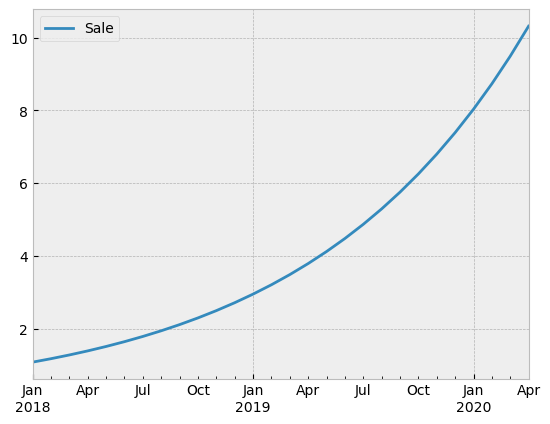

In [277]:
with plt.style.context('bmh'):
    df.plot()

DatetimeIndex

In [278]:
i = [datetime(2000, 1, 1),  datetime(2000, 1, 2), datetime(2000, 1, 2), datetime(2021, 1, 3)]
pd.Series([6, 3, 7, 5], index=i)

2000-01-01    6
2000-01-02    3
2000-01-02    7
2021-01-03    5
dtype: int64

In [279]:
i = pd.DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2021-01-03'])
ts = pd.Series([6, 3, 7, 5], index=i); ts

2000-01-01    6
2000-01-02    3
2000-01-02    7
2021-01-03    5
dtype: int64

In [280]:
ts['2000-01']  

2000-01-01    6
2000-01-02    3
2000-01-02    7
dtype: int64

In [281]:
ts['2000-01-02']  

2000-01-02    3
2000-01-02    7
dtype: int64

In [282]:
ts.index.is_unique

False

In [283]:
ts.groupby(level=0).max()

2000-01-01    6
2000-01-02    7
2021-01-03    5
dtype: int64

### Functions

truncate (before, after, axis)

In [284]:
i = pd.DatetimeIndex(['2020-1-16', '2021-1-19', '2021-1-20', '2021-1-22'])
s = pd.Series(range(4), index=i); s

2020-01-16    0
2021-01-19    1
2021-01-20    2
2021-01-22    3
dtype: int64

In [285]:
s.index[3]

Timestamp('2021-01-22 00:00:00')

In [286]:
s.truncate(before='2021-1-19')

2021-01-19    1
2021-01-20    2
2021-01-22    3
dtype: int64

In [287]:
s.truncate(after='2021-1-19')

2020-01-16    0
2021-01-19    1
dtype: int64

In [288]:
s.truncate(before='2021-1-19', after='2021-1-20')

2021-01-19    1
2021-01-20    2
dtype: int64

In [289]:
s['2021-1-19':'2021-1-20']

2021-01-19    1
2021-01-20    2
dtype: int64

In [290]:
#---------------

In [291]:
i = pd.date_range("2020-01-01", "2020-01-06")
d = {"Col1": [10, 20, 15, 30, 45, 53],
     "Col2": [13, 23, 18, 33, 48, 50],
     "Col3": [17, 27, 22, 37, 52, 57]}

In [292]:
df = pd.DataFrame(d, i); df

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52
2020-01-06,53,50,57


In [293]:
df.truncate(after='2020-01-04')

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37


In [294]:
df.truncate(before='2020-01-03')

,Col1,Col2,Col3
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52
2020-01-06,53,50,57


In [295]:
df.truncate(before='2020-01-03', after='2020-01-04')

,Col1,Col2,Col3
2020-01-03,15,18,22
2020-01-04,30,33,37


In [296]:
df.loc['2020-01-03':'2020-01-04', :]

,Col1,Col2,Col3
2020-01-03,15,18,22
2020-01-04,30,33,37


shift (periods, freq, axis, fill_value, suffix)

In [297]:
i = pd.date_range('2021-01-20', periods=4, freq='D')
ts = pd.Series([1, 2, 3, 4], index=i)

In [298]:
ts

2021-01-20    1
2021-01-21    2
2021-01-22    3
2021-01-23    4
Freq: D, dtype: int64

In [299]:
ts.shift(1)

2021-01-20    NaN
2021-01-21    1.0
2021-01-22    2.0
2021-01-23    3.0
Freq: D, dtype: float64

In [300]:
ts.shift(-2)

2021-01-20    3.0
2021-01-21    4.0
2021-01-22    NaN
2021-01-23    NaN
Freq: D, dtype: float64

In [301]:
ts

2021-01-20    1
2021-01-21    2
2021-01-22    3
2021-01-23    4
Freq: D, dtype: int64

In [302]:
ts.shift(2, freq='D')

2021-01-22    1
2021-01-23    2
2021-01-24    3
2021-01-25    4
Freq: D, dtype: int64

In [303]:
ts.shift(-2, freq='D')

2021-01-18    1
2021-01-19    2
2021-01-20    3
2021-01-21    4
Freq: D, dtype: int64

In [304]:
#---------------

In [305]:
i = pd.date_range("2020-01-01", "2020-01-05")
d = {"Col1": [10, 20, 15, 30, 45],
     "Col2": [13, 23, 18, 33, 48],
     "Col3": [17, 27, 22, 37, 52]}

In [306]:
df = pd.DataFrame(d, i); df

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


In [307]:
df.shift(periods=3)

,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-04,10.0,13.0,17.0
2020-01-05,20.0,23.0,27.0


In [308]:
df.shift(periods=3, fill_value=0)

,Col1,Col2,Col3
2020-01-01,0,0,0
2020-01-02,0,0,0
2020-01-03,0,0,0
2020-01-04,10,13,17
2020-01-05,20,23,27


In [309]:
df.shift(periods=1, axis="columns")

,Col1,Col2,Col3
2020-01-01,NaN,10,13
2020-01-02,NaN,20,23
2020-01-03,NaN,15,18
2020-01-04,NaN,30,33
2020-01-05,NaN,45,48


In [310]:
df.shift(periods=3, freq="infer")

,Col1,Col2,Col3
2020-01-04,10,13,17
2020-01-05,20,23,27
2020-01-06,15,18,22
2020-01-07,30,33,37
2020-01-08,45,48,52


In [311]:
df.shift(periods=3, freq="D")

,Col1,Col2,Col3
2020-01-04,10,13,17
2020-01-05,20,23,27
2020-01-06,15,18,22
2020-01-07,30,33,37
2020-01-08,45,48,52


In [312]:
df['Col1'].shift(periods=[0, 1, 2])

,Col1_0,Col1_1,Col1_2
2020-01-01,10,NaN,NaN
2020-01-02,20,10.0,NaN
2020-01-03,15,20.0,10.0
2020-01-04,30,15.0,20.0
2020-01-05,45,30.0,15.0


resample (rule, axis, closed, label, convention, kind, on, level, origin, offset, group_keys)

In [313]:
index = pd.date_range('1/1/2000', periods=9, freq='T')
s = pd.Series(range(9), index=index); s

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [314]:
s.resample('3T')

In [315]:
s.resample('3T').asfreq()

2000-01-01 00:00:00    0
2000-01-01 00:03:00    3
2000-01-01 00:06:00    6
Freq: 3T, dtype: int64

In [316]:
s.resample('3T').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [317]:
s.resample('3T', label='right').sum()

2000-01-01 00:03:00     3
2000-01-01 00:06:00    12
2000-01-01 00:09:00    21
Freq: 3T, dtype: int64

In [318]:
s.resample('3T', label='right', closed='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:03:00     6
2000-01-01 00:06:00    15
2000-01-01 00:09:00    15
Freq: 3T, dtype: int64

In [319]:
s.resample('30S').asfreq()[0:5]

2000-01-01 00:00:00    0.0
2000-01-01 00:00:30    NaN
2000-01-01 00:01:00    1.0
2000-01-01 00:01:30    NaN
2000-01-01 00:02:00    2.0
Freq: 30S, dtype: float64

In [320]:
s.resample('30S').ffill()[0:5]

2000-01-01 00:00:00    0
2000-01-01 00:00:30    0
2000-01-01 00:01:00    1
2000-01-01 00:01:30    1
2000-01-01 00:02:00    2
Freq: 30S, dtype: int64

In [321]:
s.resample('30S').bfill()[0:5]

2000-01-01 00:00:00    0
2000-01-01 00:00:30    1
2000-01-01 00:01:00    1
2000-01-01 00:01:30    2
2000-01-01 00:02:00    2
Freq: 30S, dtype: int64

In [322]:
#---------------

In [323]:
d = {'price': [10, 11, 9, 13, 14, 18, 17, 19],
     'volume': [50, 60, 40, 100, 50, 100, 40, 50],
     'week_starting':pd.date_range('01/01/2018',periods=8,freq='W')}

In [324]:
df = pd.DataFrame(d); df

,price,volume,week_starting
0,10,50,2018-01-07
1,11,60,2018-01-14
2,9,40,2018-01-21
3,13,100,2018-01-28
4,14,50,2018-02-04
5,18,100,2018-02-11
6,17,40,2018-02-18
7,19,50,2018-02-25


In [325]:
df.resample('M', on='week_starting').min()

,price,volume
week_starting,,
2018-01-31,9,40
2018-02-28,14,40


In [326]:
df.resample('M', on='week_starting').mean()

,price,volume
week_starting,,
2018-01-31,10.75,62.5
2018-02-28,17.00,60.0


In [327]:
#---------------

In [328]:
i = pd.date_range('2021-1-20', periods=2, freq='W-WED')
df = pd.DataFrame([[1, 2],[4, 5]], index=i, columns=['Hamedan', 'Tehran']); df

,Hamedan,Tehran
2021-01-20,1,2
2021-01-27,4,5


In [329]:
df.resample('D').asfreq()

,Hamedan,Tehran
2021-01-20,1.0,2.0
2021-01-21,NaN,NaN
2021-01-22,NaN,NaN
2021-01-23,NaN,NaN
2021-01-24,NaN,NaN
2021-01-25,NaN,NaN
2021-01-26,NaN,NaN
2021-01-27,4.0,5.0


In [330]:
df.resample('D').ffill(limit=2)

,Hamedan,Tehran
2021-01-20,1.0,2.0
2021-01-21,1.0,2.0
2021-01-22,1.0,2.0
2021-01-23,NaN,NaN
2021-01-24,NaN,NaN
2021-01-25,NaN,NaN
2021-01-26,NaN,NaN
2021-01-27,4.0,5.0


In [331]:
#---------------

In [332]:
i = pd.date_range('2021-1-20 00:00', periods=4, freq='1min')
df = pd.DataFrame({'time': i, 'value': np.arange(4)}); df

,time,value
0,2021-01-20 00:00:00,0
1,2021-01-20 00:01:00,1
2,2021-01-20 00:02:00,2
3,2021-01-20 00:03:00,3


In [333]:
f = df.set_index('time'); f

,value
time,
2021-01-20 00:00:00,0
2021-01-20 00:01:00,1
2021-01-20 00:02:00,2
2021-01-20 00:03:00,3


In [334]:
f.resample('3min').count()

,value
time,
2021-01-20 00:00:00,3
2021-01-20 00:03:00,1


In [335]:
f.resample('2min').count()

,value
time,
2021-01-20 00:00:00,2
2021-01-20 00:02:00,2


# cut 

cut (x, bins, right, labels, retbins, include_lowest)

In [336]:
score = [20, 8, 17, 10]

In [337]:
c = pd.cut(x=score, bins=3); c

[(16.0, 20.0], (7.988, 12.0], (16.0, 20.0], (7.988, 12.0]]
Categories (3, interval[float64, right]): [(7.988, 12.0] < (12.0, 16.0] < (16.0, 20.0]]

In [338]:
type(c)

pandas.core.arrays.categorical.Categorical

In [339]:
c.categories

IntervalIndex([(7.988, 12.0], (12.0, 16.0], (16.0, 20.0]], dtype='interval[float64, right]')

In [340]:
c.codes

array([2, 0, 2, 0], dtype=int8)

In [341]:
c.value_counts()

(7.988, 12.0]    2
(12.0, 16.0]     0
(16.0, 20.0]     2
Name: count, dtype: int64

In [342]:
#---------------

In [343]:
pd.cut(x=score, bins=2)

[(14.0, 20.0], (7.988, 14.0], (14.0, 20.0], (7.988, 14.0]]
Categories (2, interval[float64, right]): [(7.988, 14.0] < (14.0, 20.0]]

In [344]:
pd.cut(x=score, bins=6)

[(18.0, 20.0], (7.988, 10.0], (16.0, 18.0], (7.988, 10.0]]
Categories (6, interval[float64, right]): [(7.988, 10.0] < (10.0, 12.0] < (12.0, 14.0] < (14.0, 16.0] < (16.0, 18.0] < (18.0, 20.0]]

In [345]:
#---------------

In [346]:
bin = [0, 9, 15, 20]

In [347]:
c = pd.cut(x=score, bins=bin); c

[(15, 20], (0, 9], (15, 20], (9, 15]]
Categories (3, interval[int64, right]): [(0, 9] < (9, 15] < (15, 20]]

In [348]:
c.codes

array([2, 0, 2, 1], dtype=int8)

In [349]:
c.value_counts()

(0, 9]      1
(9, 15]     1
(15, 20]    2
Name: count, dtype: int64

In [350]:
#---------------

In [351]:
pd.IntervalIndex.from_tuples([(0, 4), (8, 12), (16, 20)])

IntervalIndex([(0, 4], (8, 12], (16, 20]], dtype='interval[int64, right]')

In [352]:
pd.IntervalIndex.from_tuples([(0, 4), (8, 12), (16, 20)], closed='left')

IntervalIndex([[0, 4), [8, 12), [16, 20)], dtype='interval[int64, left]')

In [353]:
b = pd.IntervalIndex.from_tuples([(0, 4), (8, 12), (16, 20)])
s = [20, 8, 17, 3]

In [354]:
c = pd.cut(s, b); c

[(16.0, 20.0], NaN, (16.0, 20.0], (0.0, 4.0]]
Categories (3, interval[int64, right]): [(0, 4] < (8, 12] < (16, 20]]

In [355]:
c.codes

array([ 2, -1,  2,  0], dtype=int8)

right

In [356]:
pd.cut(score, bin)

[(15, 20], (0, 9], (15, 20], (9, 15]]
Categories (3, interval[int64, right]): [(0, 9] < (9, 15] < (15, 20]]

In [357]:
c = pd.cut(score, bin, right=False); c

[NaN, [0.0, 9.0), [15.0, 20.0), [9.0, 15.0)]
Categories (3, interval[int64, left]): [[0, 9) < [9, 15) < [15, 20)]

In [358]:
c.codes

array([-1,  0,  2,  1], dtype=int8)

In [359]:
c.value_counts()

[0, 9)      1
[9, 15)     1
[15, 20)    1
Name: count, dtype: int64

labels

In [360]:
pd.cut(score, bin)

[(15, 20], (0, 9], (15, 20], (9, 15]]
Categories (3, interval[int64, right]): [(0, 9] < (9, 15] < (15, 20]]

In [361]:
label = ["bad", "medium", "good" ]

In [362]:
c = pd.cut(score, bin, labels=label); c

['good', 'bad', 'good', 'medium']
Categories (3, object): ['bad' < 'medium' < 'good']

In [363]:
c.codes

array([2, 0, 2, 1], dtype=int8)

In [364]:
c.value_counts()

bad       1
medium    1
good      2
Name: count, dtype: int64

In [365]:
#---------------

In [366]:
pd.cut(score, bin, labels=False)

array([2, 0, 2, 1], dtype=int64)

retbins

In [367]:
pd.cut(score, bin)

[(15, 20], (0, 9], (15, 20], (9, 15]]
Categories (3, interval[int64, right]): [(0, 9] < (9, 15] < (15, 20]]

In [368]:
pd.cut(score, bin, retbins=True)

([(15, 20], (0, 9], (15, 20], (9, 15]]
 Categories (3, interval[int64, right]): [(0, 9] < (9, 15] < (15, 20]],
 array([ 0,  9, 15, 20]))

In [369]:
pd.cut(score, bin, labels=label, retbins=True)

(['good', 'bad', 'good', 'medium']
 Categories (3, object): ['bad' < 'medium' < 'good'],
 array([ 0,  9, 15, 20]))

In [370]:
pd.cut(score, 3, retbins=True)

([(16.0, 20.0], (7.988, 12.0], (16.0, 20.0], (7.988, 12.0]]
 Categories (3, interval[float64, right]): [(7.988, 12.0] < (12.0, 16.0] < (16.0, 20.0]],
 array([ 7.988, 12.   , 16.   , 20.   ]))

include_lowest

In [371]:
pd.cut(score, bin)

[(15, 20], (0, 9], (15, 20], (9, 15]]
Categories (3, interval[int64, right]): [(0, 9] < (9, 15] < (15, 20]]

In [372]:
pd.cut(score, bin, include_lowest=True)

[(15.0, 20.0], (-0.001, 9.0], (15.0, 20.0], (9.0, 15.0]]
Categories (3, interval[float64, right]): [(-0.001, 9.0] < (9.0, 15.0] < (15.0, 20.0]]

..........

serie

In [373]:
s = pd.Series([20, 8, 17, 10], ['ali', 'sara', 'omid', 'taha']); s

ali     20
sara     8
omid    17
taha    10
dtype: int64

In [374]:
pd.cut(x=s, bins=3)

ali      (16.0, 20.0]
sara    (7.988, 12.0]
omid     (16.0, 20.0]
taha    (7.988, 12.0]
dtype: category
Categories (3, interval[float64, right]): [(7.988, 12.0] < (12.0, 16.0] < (16.0, 20.0]]

In [375]:
pd.cut(x=s, bins=3, labels=False)

ali     2
sara    0
omid    2
taha    0
dtype: int64

In [376]:
pd.cut(x=s, bins=3, labels=label)

ali     good
sara     bad
omid    good
taha     bad
dtype: category
Categories (3, object): ['bad' < 'medium' < 'good']

In [377]:
#---------------

In [378]:
s

ali     20
sara     8
omid    17
taha    10
dtype: int64

In [379]:
c = pd.cut(x=s.values, bins=3); c

[(16.0, 20.0], (7.988, 12.0], (16.0, 20.0], (7.988, 12.0]]
Categories (3, interval[float64, right]): [(7.988, 12.0] < (12.0, 16.0] < (16.0, 20.0]]

In [380]:
c.codes

array([2, 0, 2, 0], dtype=int8)

In [381]:
c.value_counts()

(7.988, 12.0]    2
(12.0, 16.0]     0
(16.0, 20.0]     2
Name: count, dtype: int64

In [382]:
s.value_counts()

20    1
8     1
17    1
10    1
Name: count, dtype: int64

In [383]:
s.value_counts(bins=3)

(7.987, 12.0]    2
(16.0, 20.0]     2
(12.0, 16.0]     0
Name: count, dtype: int64

In [384]:
s.value_counts(bins=4)

(7.987, 11.0]    2
(14.0, 17.0]     1
(17.0, 20.0]     1
(11.0, 14.0]     0
Name: count, dtype: int64

dataframe

In [385]:
d = {'Python': {'Ali': 12, 'Sara': 13, 'Taha': 12},
     'C++':    {'Ali': 20, 'Sara': 14, 'Taha': 8},
     'Java':   {'Ali': 18, 'Sara': 6,  'Taha': 19}}

In [386]:
df = pd.DataFrame(d); df

,Python,C++,Java
Ali,12,20,18
Sara,13,14,6
Taha,12,8,19


In [387]:
pd.cut(x=df['C++'], bins=3)

Ali      (16.0, 20.0]
Sara     (12.0, 16.0]
Taha    (7.988, 12.0]
Name: C++, dtype: category
Categories (3, interval[float64, right]): [(7.988, 12.0] < (12.0, 16.0] < (16.0, 20.0]]

In [388]:
bin = [0, 9, 15, 20]
pd.cut(x=df.loc['Ali'], bins=bin)

Python     (9, 15]
C++       (15, 20]
Java      (15, 20]
Name: Ali, dtype: category
Categories (3, interval[int64, right]): [(0, 9] < (9, 15] < (15, 20]]

# get_dummies

get_dummies (data, prefix, dummy_na, dtype)

In [389]:
l = list('abca'); l

['a', 'b', 'c', 'a']

In [390]:
pd.get_dummies(l)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


In [391]:
pd.get_dummies(l, dtype=int)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [392]:
pd.get_dummies(l).replace({True: 1, False: 0})

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [393]:
#---------------

In [394]:
l = list('baa')

In [395]:
pd.get_dummies(l, dtype=int)

,a,b
0,0,1
1,1,0
2,1,0


In [396]:
#---------------

In [397]:
l = ['a', 'b', NaN]

In [398]:
pd.get_dummies(l, dtype=int)

,a,b
0,1,0
1,0,1
2,0,0


In [399]:
pd.get_dummies(l, dummy_na=True, dtype=int)

,a,b,NaN
0,1,0,0
1,0,1,0
2,0,0,1


In [400]:
#---------------

In [401]:
s = pd.Series(list('abcaa')); s

0    a
1    b
2    c
3    a
4    a
dtype: object

In [402]:
pd.get_dummies(s, dtype=int)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0


..........

In [403]:
d = {'F1': ['a', 'b', 'c'], 'F2': [5, 3, 5], 'F3': ['b', 'a', 'a'], 'F4': [7, 2, 3]}
df = pd.DataFrame(d); df

,F1,F2,F3,F4
0,a,5,b,7
1,b,3,a,2
2,c,5,a,3


In [404]:
pd.get_dummies(df['F1'])

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True


In [405]:
pd.get_dummies(df['F2'])

,3,5
0,False,True
1,True,False
2,False,True


In [406]:
df

,F1,F2,F3,F4
0,a,5,b,7
1,b,3,a,2
2,c,5,a,3


In [407]:
pd.get_dummies(df)

,F2,F4,F1_a,F1_b,F1_c,F3_a,F3_b
0,5,7,True,False,False,False,True
1,3,2,False,True,False,True,False
2,5,3,False,False,True,True,False


In [408]:
pd.get_dummies(df, dtype=int)

,F2,F4,F1_a,F1_b,F1_c,F3_a,F3_b
0,5,7,1,0,0,0,1
1,3,2,0,1,0,1,0
2,5,3,0,0,1,1,0


In [409]:
pd.get_dummies(df, prefix=['col1', 'col3'], dtype=int)

,F2,F4,col1_a,col1_b,col1_c,col3_a,col3_b
0,5,7,1,0,0,0,1
1,3,2,0,1,0,1,0
2,5,3,0,0,1,1,0
